In [1]:
# Import keras and other Utils
import pltutils as pltu
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2
import tensorflow as tf

from keras.datasets import mnist
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Conv2D
from keras.layers import Reshape, MaxPooling2D, Flatten
from keras.layers import Input, InputLayer, Lambda, Dropout
from keras.layers import BatchNormalization,Softmax
from keras.optimizers import RMSprop
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator 

Using TensorFlow backend.


In [2]:
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [3]:
model = Sequential()
model.add(Reshape((28,28,1),input_shape=(28,28)))
model.add(Conv2D(16,(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Conv2D(36,(5,5), padding='same',activation='relu' ))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10,activation='softmax'))
print (model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [4]:
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', metrics=['accuracy'])

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
train = x_train/255.
test = x_test/255.
cls_train = y_train
cls_test = y_test
cat_train = np_utils.to_categorical(y_train, num_classes=10)
cat_test = np_utils.to_categorical(y_test, num_classes=10)

In [17]:
model.fit(train, cat_train, epochs=1, batch_size=128)

Epoch 1/1
60000/60000 [==============================] - 4s 59us/step - loss: 0.0247 - accuracy: 0.9920


In [18]:
loss, accuracy = model.evaluate(test,cat_test)
print ("loss:{0}, accuracy:{1}".format(loss, accuracy))

10000/10000 [==============================] - 1s 85us/step
loss:0.024762776272019255, accuracy:0.9916999936103821


In [19]:
cat_test_pred = model.predict(test)
cls_test_pred = np.argmax(cat_test_pred, axis=1)

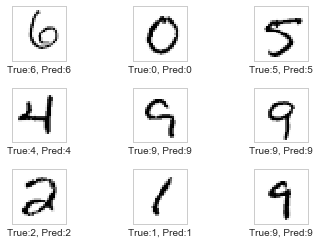

In [9]:
start = 100
end = start+10
pltu.plot_images(test[start:end],cls_test[start:end],cls_test_pred[start:end])

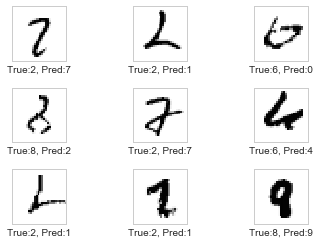

In [20]:
pltu.plot_error_images(test,cls_test,cls_test_pred)